# Notebook 01: Data preprocessing and visualization

In this notebook, a preprocessing of the LHC Olympics R&D dataset is performed and the related variable distributions are visualized.

The code used is based on the `run_data_preparation_LHCORD.py` script from the official repository.

## Step 1: Getting the LHC Olympics R&D dataset

In [1]:
import pandas as pd
import numpy as np
import os

# base directory of the repository
basedir = os.environ['ADMLWORKDIR']

# directory to the unprocessed LHC Olympics R&D dataset
raw_data_dir       = os.path.join(basedir, "data")
# directory to the dataset after preprocessing  (output directory)
processed_data_dir = os.path.join(basedir, "preprocessed_data")
# Signal over background ratio in the signal region.
S_over_B = -1
# Random seed for the mixing
seed = 1

In [2]:
filenames = {
    # the "data" containing too much signal
    'features': os.path.join(raw_data_dir, "events_anomalydetection_v2.features.h5"),
    # additionally produced bkg
    'features_extrabkg': os.path.join(raw_data_dir, "events_anomalydetection_qcd_extra_inneronly_features.h5")
}
# download the files if not exists
if not os.path.exists(filenames['features']):
    !wget -P {raw_data_dir} https://zenodo.org/record/4536377/files/events_anomalydetection_v2.features.h5
if not os.path.exists(filenames['features_extrabkg']):      
    !wget -P {raw_data_dir} https://zenodo.org/record/5759087/files/events_anomalydetection_qcd_extra_inneronly_features.h5

--2023-08-18 16:52:09--  https://zenodo.org/record/4536377/files/events_anomalydetection_v2.features.h5
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74315238 (71M) [application/octet-stream]
Saving to: ‘/afs/cern.ch/work/c/chlcheng/Repository/CATHODE/data/events_anomalydetection_v2.features.h5’

100%[======================================>] 74,315,238  63.9MB/s   in 1.1s   

2023-08-18 16:52:15 (63.9 MB/s) - ‘/afs/cern.ch/work/c/chlcheng/Repository/CATHODE/data/events_anomalydetection_v2.features.h5’ saved [74315238/74315238]

--2023-08-18 16:52:15--  https://zenodo.org/record/5759087/files/events_anomalydetection_qcd_extra_inneronly_features.h5
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38554784 (37M) [application/octet

In [3]:
features = pd.read_hdf(filenames['features'])
features_extrabkg = pd.read_hdf(filenames['features_extrabkg'])

In [4]:
## to be split among the different sets 
features_extrabkg1 = features_extrabkg[:312858]

## to be used to enhance the evalaution
features_extrabkg2 = features_extrabkg[312858:]

features_sig = features[features['label'] == 1]
features_bkg = features[features['label'] == 0]

### Visualizing the unprocessed input variables

The input variables are:
- `pxj1`: $p_x$ of the first jet (in GeV)
- `pyj1`: $p_y$ of the first jet (in GeV)
- `pzj1`: $p_z$ of the first jet (in GeV)
- `mj1`: invariant mass of the first jet (in GeV)
- `tau1j1`: n-jettiness variable $\tau_1$ of the first jet
- `tau2j1`: n-jettiness variable $\tau_2$ of the first jet
- `tau3j1`: n-jettiness variable $\tau_3$ of the first jet
- `pxj2`: $p_x$ of the second jet (in GeV)
- `pyj2`: $p_y$ of the second jet (in GeV)
- `pzj2`: $p_z$ of the second jet (in GeV)
- `mj2`: invariant mass of the second jet (in GeV)
- `tau1j2`: n-jettiness variable $\tau_1$ of the second jet
- `tau2j2`: n-jettiness variable $\tau_2$ of the second jet
- `tau3j2`: n-jettiness variable $\tau_3$ of the second jet

In [5]:
import matplotlib.pyplot as plt
from quickstats.plots import VariableDistributionPlot
input_dfs = {
    'signal': features_sig,
    'background': features_bkg,
    'extra_background': features_extrabkg
}
label_map = {
    'sig': 'Signal',
    'bkg': 'Background',
    'extrabkg': 'Extra background'
}
column_map = {
    'pxj1': r'$p_{x, j1}$',
    'pyj1': r'$p_{y, j1}$',
    'pzj1': r'$p_{z, j1}$',
    'mj1': r'$m_{j1}$',
    'tau1j1': r'$\tau_{1, j1}$',
    'tau2j1': r'$\tau_{2, j1}$',
    'tau3j1': r'$\tau_{3, j1}$',
    'pxj2': r'$p_{x, j2}$',
    'pyj2': r'$p_{y, j2}$',
    'pzj2': r'$p_{z, j2}$',
    'mj2': r'$m_{j2}$',
    'tau1j2': r'$\tau_{1, j2}$',
    'tau2j2': r'$\tau_{2, j2}$',
    'tau3j2': r'$\tau_{3, j2}$'
}
units = {
    'pxj1': 'GeV',
    'pyj1': 'GeV',
    'pzj1': 'GeV',
    'mj1': 'GeV',
    'pxj2': 'GeV',
    'pyj2': 'GeV',
    'pzj2': 'GeV',
    'mj2': 'GeV'
}

plotter = VariableDistributionPlot(input_dfs, label_map=label_map, color_cycle='simple_contrast')

[INFO] Using deduced bin range (-3880.100, 3852.430)


<Figure size 640x480 with 0 Axes>

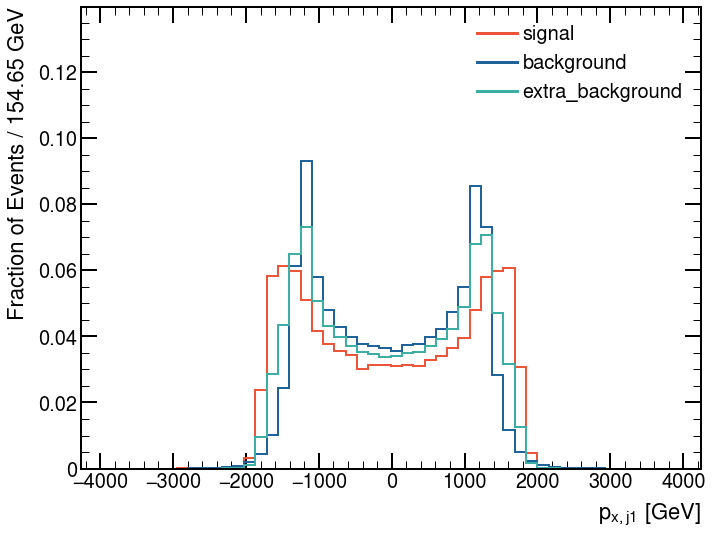

[INFO] Using deduced bin range (-3320.690, 3484.770)


<Figure size 640x480 with 0 Axes>

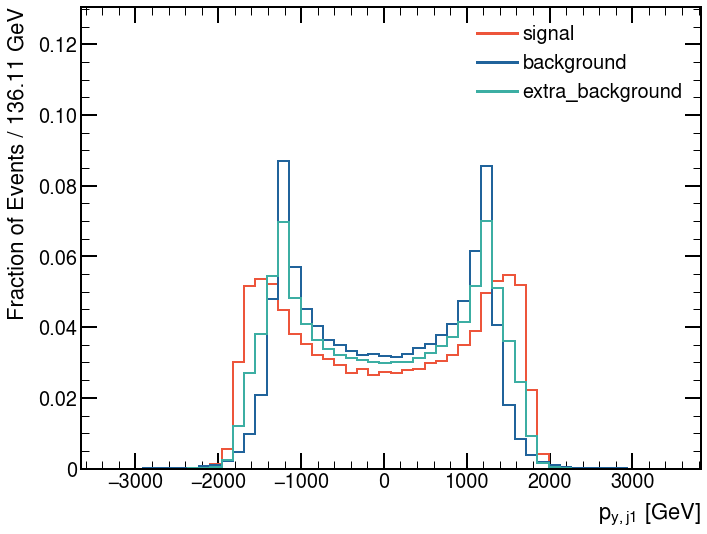

[INFO] Using deduced bin range (-5587.720, 6155.580)


<Figure size 640x480 with 0 Axes>

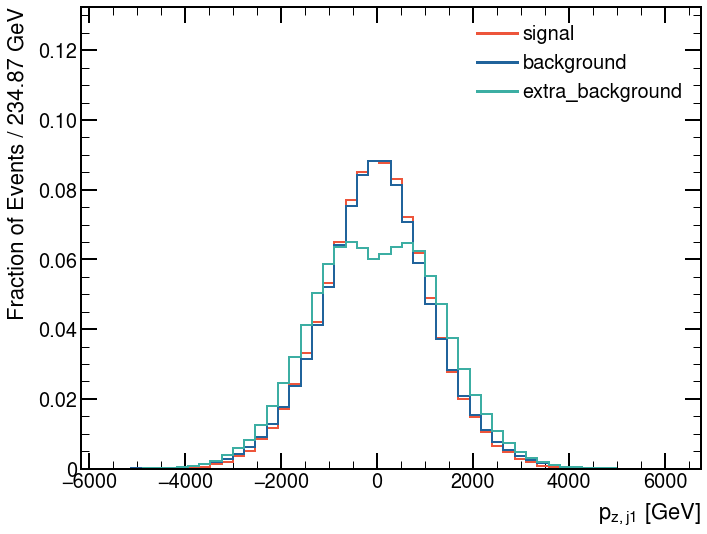

[INFO] Using deduced bin range (-0.000, 1615.690)


<Figure size 640x480 with 0 Axes>

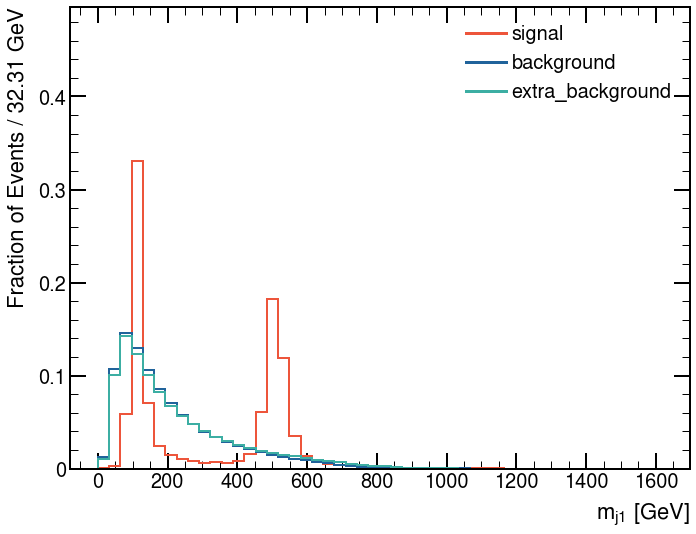

[INFO] Using deduced bin range (0.000, 1473.960)


<Figure size 640x480 with 0 Axes>

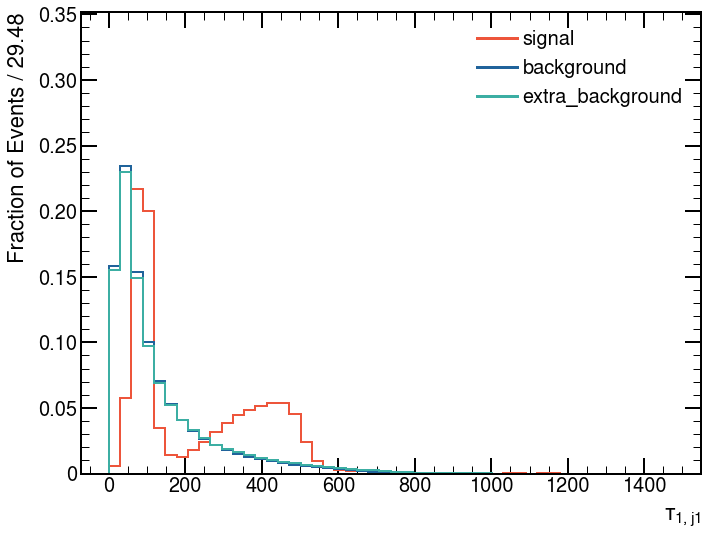

[INFO] Using deduced bin range (0.000, 756.494)


<Figure size 640x480 with 0 Axes>

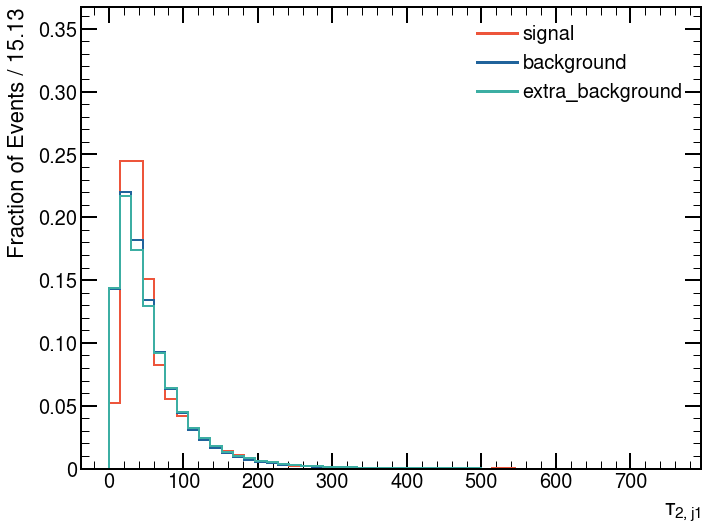

[INFO] Using deduced bin range (0.000, 466.019)


<Figure size 640x480 with 0 Axes>

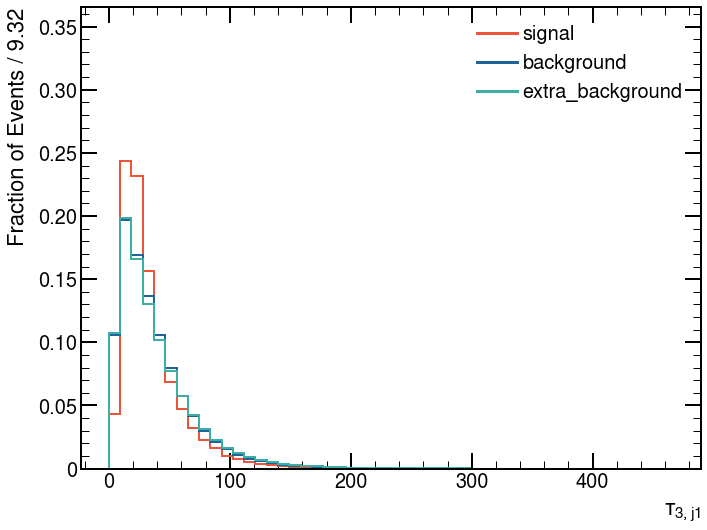

[INFO] Using deduced bin range (-3740.480, 3630.150)


<Figure size 640x480 with 0 Axes>

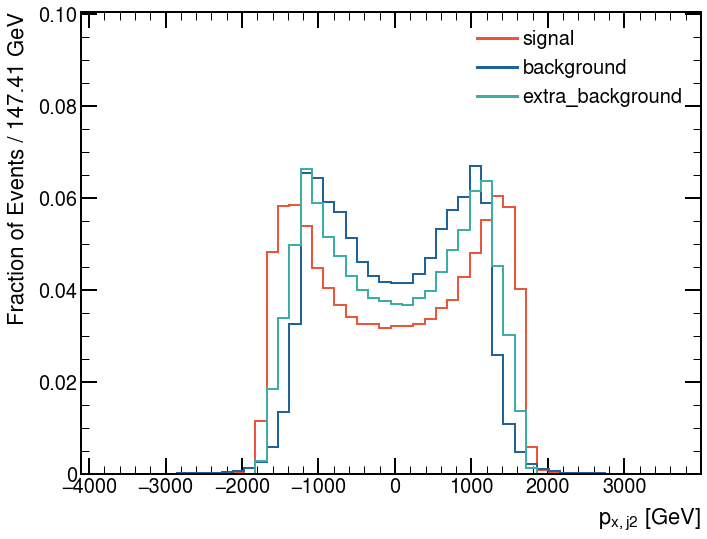

[INFO] Using deduced bin range (-3406.180, 3295.420)


<Figure size 640x480 with 0 Axes>

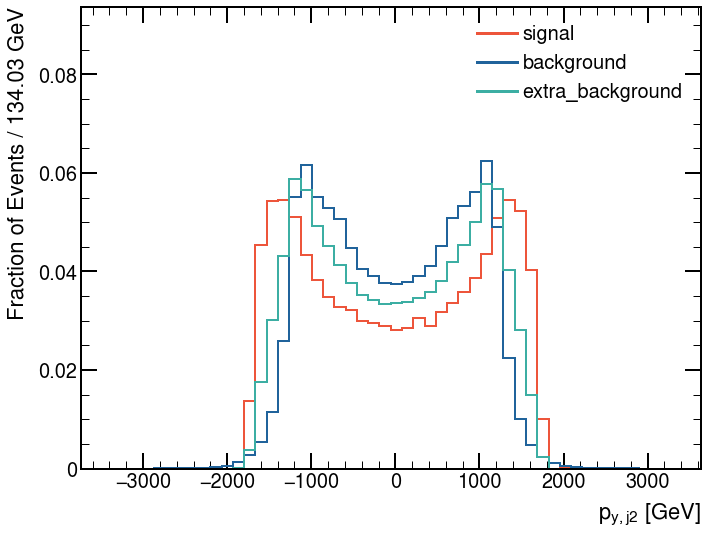

[INFO] Using deduced bin range (-5490.730, 5620.940)


<Figure size 640x480 with 0 Axes>

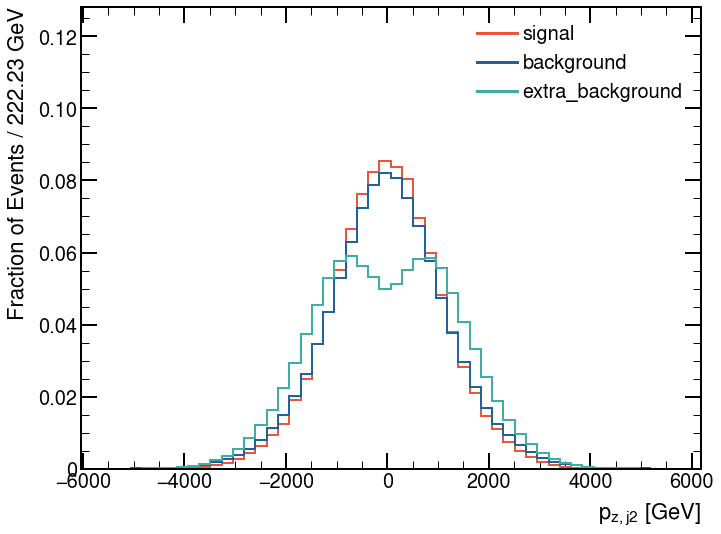

[INFO] Using deduced bin range (-0.000, 1508.690)


<Figure size 640x480 with 0 Axes>

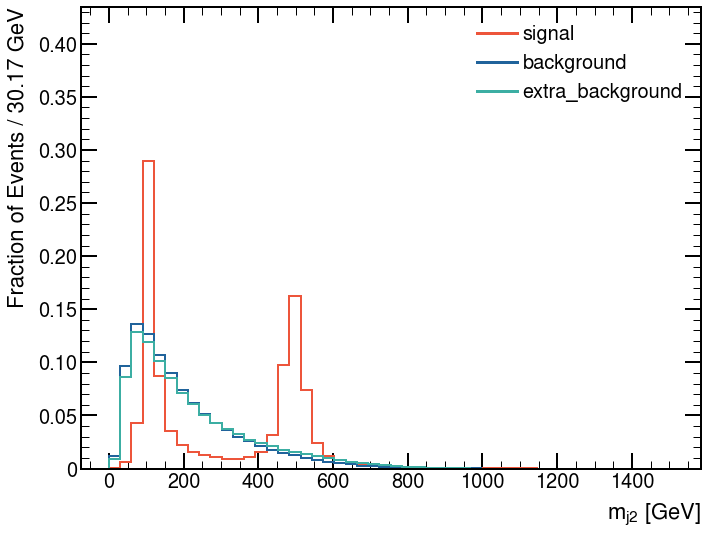

[INFO] Using deduced bin range (0.000, 1464.820)


<Figure size 640x480 with 0 Axes>

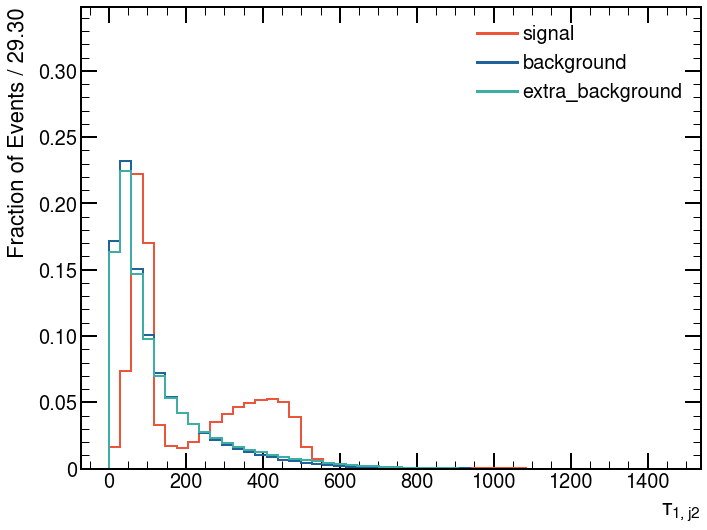

[INFO] Using deduced bin range (0.000, 745.041)


<Figure size 640x480 with 0 Axes>

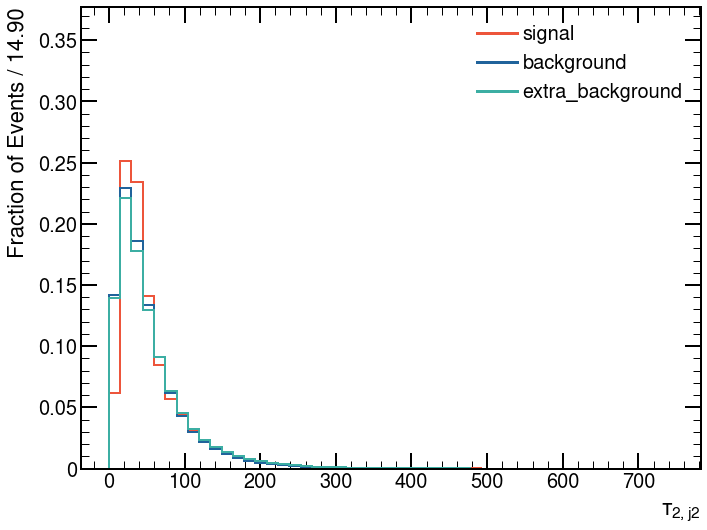

[INFO] Using deduced bin range (0.000, 491.461)


<Figure size 640x480 with 0 Axes>

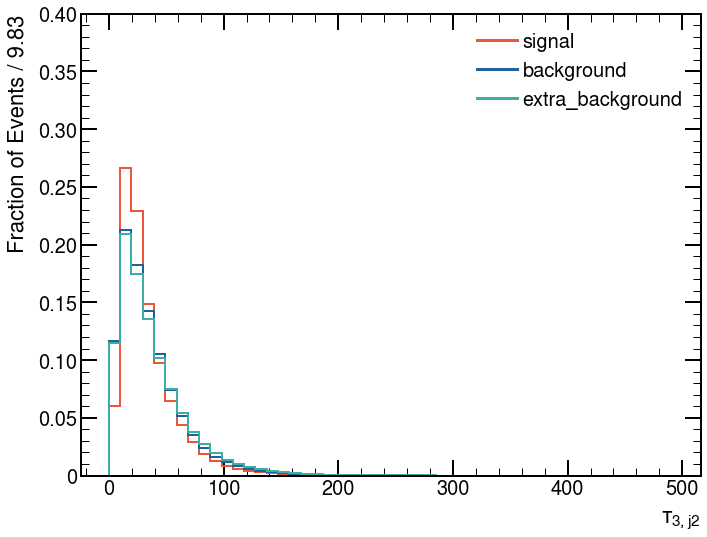

In [6]:
for column in features.columns:
    if column == 'label':
        continue
    plotter.draw(column, unit=units.get(column, None), xlabel=column_map.get(column, column), bins=50)
    plt.show()

## Step 2: Data Preprocessing

In [7]:
processed_data = {}
processed_dfs = {}
# process data in each of the signal, background and extra backgrounds datasets
for ds_label, features_ds in [('sig', features_sig),
                              ('bkg', features_bkg),
                              ('extrabkg1', features_extrabkg1),
                              ('extrabkg2', features_extrabkg2)]:
    
    # invariant mass of the first two jets
    mj1mj2 = np.array(features_ds[['mj1','mj2']])
    # ratio between the n-jettiness variables tau2 and tau1 of the first two jets
    tau21 = np.array(features_ds[['tau2j1','tau2j2']])/(1e-5+np.array(features_ds[['tau1j1','tau1j2']]))
    
    # get the smaller value of the invariant mass of the two jets
    mjmin = mj1mj2.min(axis=1) / 1000
    # get the larger value of the invariant mass of the two jets
    mjmax = mj1mj2.max(axis=1) / 1000
    # ratio between the n-jettiness variables tau2 and tau1 from the jet with smaller invariant mass
    tau21min = np.take_along_axis(tau21, mj1mj2.argmin(axis=1, keepdims=True), axis=1).flatten()
    # ratio between the n-jettiness variables tau2 and tau1 from the jet with larger invariant mass
    tau21max = np.take_along_axis(tau21, mj1mj2.argmax(axis=1, keepdims=True), axis=1).flatten()
    
    # sum of momentum between the two jets
    pjj = (np.array(features_ds[['pxj1', 'pyj1', 'pzj1']]) + np.array(features_ds[['pxj2', 'pyj2', 'pzj2']])) / 1000
    # total energy of the two jets
    Ejj = (np.sqrt(np.sum(np.array(features_ds[['pxj1', 'pyj1', 'pzj1', 'mj1']])**2, axis=1)) +
           np.sqrt(np.sum(np.array(features_ds[['pxj2', 'pyj2', 'pzj2', 'mj2']])**2, axis=1))) / 1000
    # invariant mass of the dijet system
    mjj = np.sqrt(Ejj**2 - np.sum(pjj**2, axis=1))
    
    processed_data[ds_label] = {
        'mjj': mjj,
        'mjmin': mjmin,
        'delta_mj': mjmax - mjmin,
        'tau21min': tau21min,
        'tau21max': tau21max
    }
    if 'sig' in ds_label:
        processed_data[ds_label]['label'] = np.ones(mjmin.shape)
    else:
        processed_data[ds_label]['label'] = np.zeros(mjmin.shape)
    processed_dfs[ds_label] = pd.DataFrame(processed_data[ds_label])

### Visualizing the processed input variables

The processed input variables are:
- 'mjj': invariant mass of the dijet system
- 'mjmin': the smaller of the invariant mass of the two jets
- 'delta_mj': the difference in the invariant mass of the two jets
- 'tau21min': ratio between the n-jettiness variables $\tau_2$ and $\tau_1$ from the jet with smaller invariant mass
- 'tau21max': ratio between the n-jettiness variables $\tau_2$ and $\tau_1$ from the jet with larger invariant mass

In [8]:
label_map = {
    'sig': 'Signal',
    'bkg': 'Background',
    'extrabkg1': 'Extra background 1',
    'extrabkg2': 'Extra background 2'
}
column_map = {
    'mjj': r'$m_{jj}$',
    'mjmin': r'$m_{j, min}$',
    'delta_mj': r'$\delta m_{j}$',
    'tau21min': r'$\tau_{21, min}$',
    'tau21max': r'$\tau_{21, max}$'
}
column_bin_ranges = {
    'mjj': (1, 6),
    'mjmin': (0, 0.5),
    'delta_mj': (0, 1)
}
units = {
    'mjj': 'TeV',
    'mjmin': 'TeV',
    'delta_mj': 'TeV',
    'Ejj': 'TeV'
}
plotter = VariableDistributionPlot(processed_dfs, color_cycle='simple_contrast', label_map=label_map)

<Figure size 640x480 with 0 Axes>

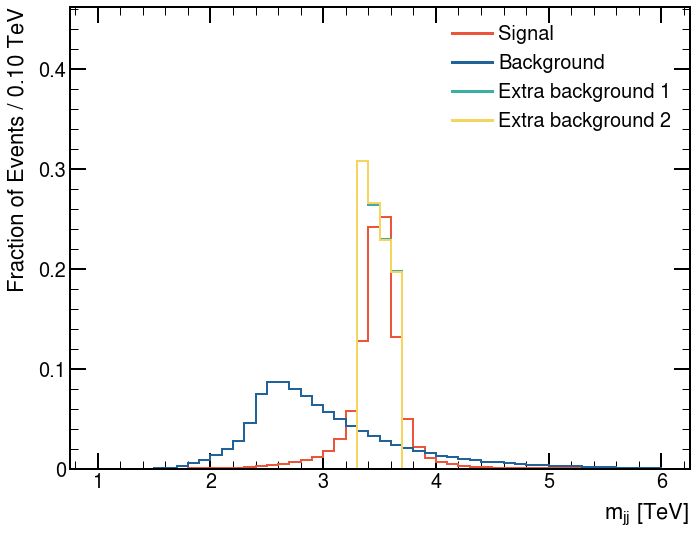

<Figure size 640x480 with 0 Axes>

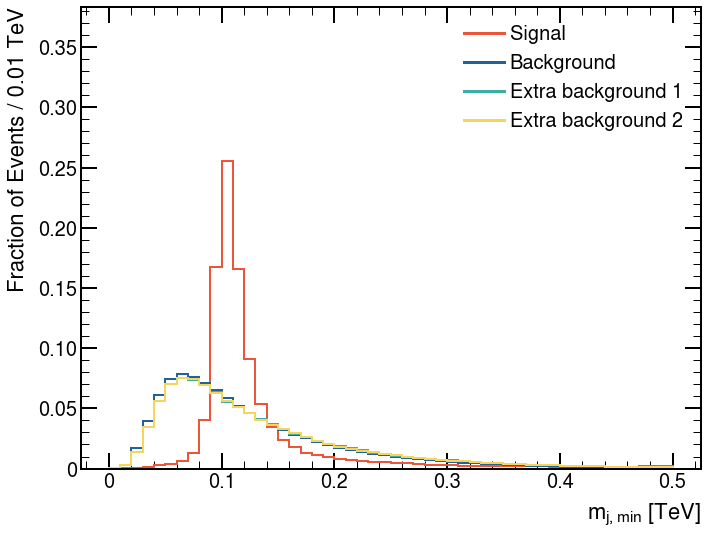

<Figure size 640x480 with 0 Axes>

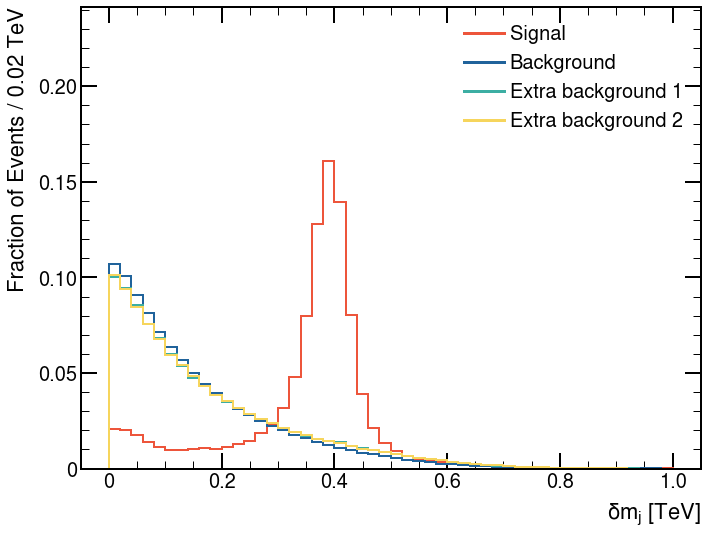

[INFO] Using deduced bin range (0.000, 1.000)


<Figure size 640x480 with 0 Axes>

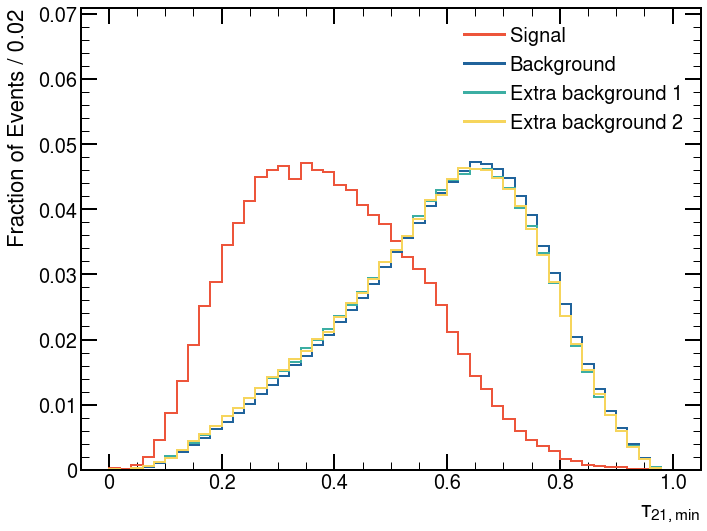

[INFO] Using deduced bin range (0.000, 0.990)


<Figure size 640x480 with 0 Axes>

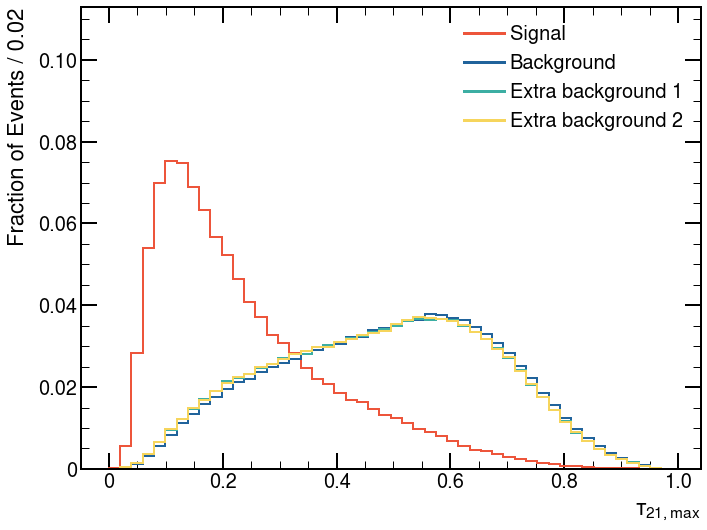

In [9]:
for column in column_map:
    plotter.draw(column, xlabel=column_map[column], unit=units.get(column, None),
                 bins=50, bin_range=column_bin_ranges.get(column, None))
    plt.show()

## Step 3: Preparing training, validation and test datasets

In [10]:
datasets = {}
# prepare training dataset
for ds_label, processed_df in processed_dfs.items():
    datasets[ds_label] = processed_df[['mjj', 'mjmin', 'delta_mj', 'tau21min', 'tau21max', 'label']].values

In [11]:
import numpy as np

# set the random seed so we get a deterministic result
np.random.seed(seed) 

if seed != 1:
    np.random.shuffle(datasets['sig'])

# number of signals to inject into the training dataset
if S_over_B == -1:
    n_sig = 1000
else:
    n_sig = int(S_over_B * 1000 / 0.006361658645922605)
    
datasets['mixed'] = np.concatenate((datasets['bkg'], datasets['sig'][:n_sig]))    

In [12]:
# shuffle the datasets
for ds_label in ['mixed', 'extrabkg1', 'extrabkg2']:
    shuffle_indices = np.random.permutation(datasets[ds_label].shape[0])
    datasets[ds_label] = datasets[ds_label][shuffle_indices]

In [13]:
# mass range of signal region in TeV
signal_range = (3.3, 3.7)

inner_datasets = {}
outer_datasets = {}
for ds_label in ['mixed', 'extrabkg1', 'extrabkg2', 'extrasig']:
    if ds_label == 'extrasig':
        dataset = datasets['sig'][n_sig:]
    else:
        dataset = datasets[ds_label]
    innermask = (dataset[:, 0] > signal_range[0]) & (dataset[:, 0] < signal_range[1])
    outermask = ~innermask
    inner_datasets[ds_label] = dataset[innermask]
    outer_datasets[ds_label] = dataset[outermask]

In [14]:
# train val test split

# sig + bkg
mixed_innerdata_train = inner_datasets['mixed'][:60000]
mixed_innerdata_val   = inner_datasets['mixed'][60000:120000]
mixed_outerdata_train = outer_datasets['mixed'][:500000]
mixed_outerdata_val   = outer_datasets['mixed'][500000:]

n_sig_test = 20000
n_extrasig_train = (inner_datasets['extrasig'].shape[0] - n_sig_test) // 2

# extra sig
extrasig_innerdata_test  = inner_datasets['extrasig'][:n_sig_test]
extrasig_innerdata_train = inner_datasets['extrasig'][n_sig_test:n_sig_test + n_extrasig_train]
extrasig_innerdata_val   = inner_datasets['extrasig'][n_sig_test + n_extrasig_train:]

n_bkg_test = 40000
n_extrabkg_train = (inner_datasets['extrabkg1'].shape[0] - n_bkg_test) // 2
# extra bkg
extrabkg1_innerdata_test  = inner_datasets['extrabkg1'][:n_bkg_test]
extrabkg1_innerdata_train = inner_datasets['extrabkg1'][n_bkg_test:n_bkg_test + n_extrabkg_train]
extrabkg1_innerdata_val   = inner_datasets['extrabkg1'][n_bkg_test + n_extrabkg_train:]

## putting together artificial test set
mixed_innerdata_test = np.vstack((extrabkg1_innerdata_test, extrasig_innerdata_test))

## Part 4: Saving the datasets

In [15]:
# saving datasets
if not os.path.exists(processed_data_dir):
    os.makedirs(processed_data_dir)
np.save(os.path.join(processed_data_dir, 'outerdata_train.npy'), mixed_outerdata_train)
np.save(os.path.join(processed_data_dir, 'outerdata_test.npy'), mixed_outerdata_val)
np.save(os.path.join(processed_data_dir, 'innerdata_train.npy'), mixed_innerdata_train)
np.save(os.path.join(processed_data_dir, 'innerdata_val.npy'), mixed_innerdata_val)   
np.save(os.path.join(processed_data_dir, 'innerdata_test.npy'), mixed_innerdata_test)      
np.save(os.path.join(processed_data_dir, 'innerdata_extrasig_train.npy'), extrasig_innerdata_train)
np.save(os.path.join(processed_data_dir, 'innerdata_extrasig_val.npy'), extrasig_innerdata_val)
np.save(os.path.join(processed_data_dir, 'innerdata_extrabkg_train.npy'), extrabkg1_innerdata_train)
np.save(os.path.join(processed_data_dir, 'innerdata_extrabkg_val.npy'), extrabkg1_innerdata_val)
np.save(os.path.join(processed_data_dir, 'innerdata_extrabkg_test.npy'), inner_datasets['extrabkg2'])

print("saved in " + processed_data_dir)

saved in /afs/cern.ch/work/c/chlcheng/Repository/CATHODE/preprocessed_data


In [16]:
# check that the output is consistent with the ones in the repository
import glob
dataset_default = {}
dataset_reprod = {}
for filename in glob.glob(os.path.join(basedir, "separated_data/*.npy")):
    basename = os.path.splitext(os.path.basename(filename))[0]
    dataset_default[basename] = np.load(filename)
for filename in glob.glob(os.path.join(basedir, f"{processed_data_dir}/*.npy")):
    basename = os.path.splitext(os.path.basename(filename))[0]
    dataset_reprod[basename] = np.load(filename)

In [17]:
for ds_label in dataset_default:
    print(f'{ds_label} : {np.allclose(dataset_default[ds_label], dataset_reprod[ds_label])}')
# only the "innerdata_extrabkg_test" dataset is different and it is checked that the difference are only
# on the order of events (probably the one in the repo is sorted with a different random state)

innerdata_extrabkg_test : False
innerdata_extrabkg_train : True
innerdata_extrabkg_val : True
innerdata_extrasig_train : True
innerdata_extrasig_val : True
innerdata_test : True
innerdata_train : True
innerdata_val : True
outerdata_test : True
outerdata_train : True
